## Practice 1 'scale algorithm 구현하기'

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### scaling 알고리즘 구현하기
- 1) Standard, MinMax, Max-Abs, Robust 함수구현
- 2) 구현된 함수를 주어진 데이터에 적용
- 3) 변환결과 그래프 확인

In [3]:
np.random.seed(2019)
df= pd.DataFrame({
    'x1':np.random.chisquare(8,10000),
    'x2':np.random.normal(5,3,10000),
    'x3':np.random.normal(-5,5,10000)
})

In [13]:
def standard(X):
    return (X-X.mean())/X.std()

def minmax(X):
    return (X-X.min())/(X.max()- X.min())

def maxabs(X):
    return X/np.abs(X).max()

def robust(X):
    return (X-X.median())/(np.percentile(X,75)-np.percentile(X,25))

### 'Standard scaling'
- μ=0, σ=1인 분포로 변환
- 표준정규분포도

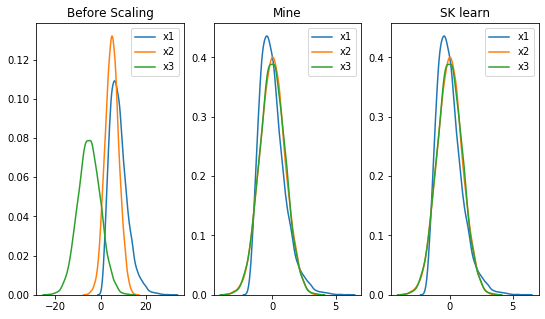

In [14]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax= ax1)
sns.kdeplot(df['x2'], ax= ax1)
sns.kdeplot(df['x3'], ax= ax1)

ax2.set_title('Mine')
sns.kdeplot(standard(df['x1']), ax= ax2)
sns.kdeplot(standard(df['x2']), ax= ax2)
sns.kdeplot(standard(df['x3']), ax= ax2)


scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])
ax3.set_title('SK learn')
sns.kdeplot(scaled_df['x1'], ax= ax3)
sns.kdeplot(scaled_df['x2'], ax= ax3)
sns.kdeplot(scaled_df['x3'], ax= ax3)

plt.show()

### 'MinMax scaling'
- 특정 범위(0~1)로 데이터 변환 
- 정규 분포가 아닌 경우 유용
- 최대, 최소 값 정보를 이용하므로 outlier에 취약함 

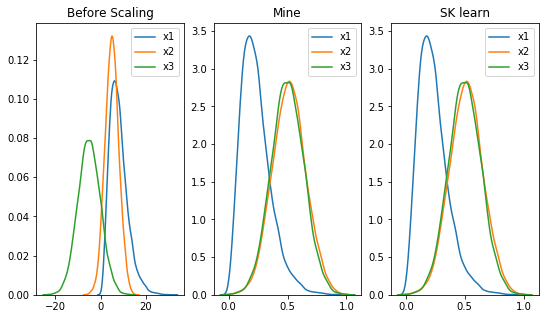

In [15]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax= ax1)
sns.kdeplot(df['x2'], ax= ax1)
sns.kdeplot(df['x3'], ax= ax1)

ax2.set_title('Mine')
sns.kdeplot(minmax(df['x1']), ax= ax2)
sns.kdeplot(minmax(df['x2']), ax= ax2)
sns.kdeplot(minmax(df['x3']), ax= ax2)


scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])
ax3.set_title('SK learn')
sns.kdeplot(scaled_df['x1'], ax= ax3)
sns.kdeplot(scaled_df['x2'], ax= ax3)
sns.kdeplot(scaled_df['x3'], ax= ax3)

plt.show()

### 'Max-Abs scaling'
- 최대 절대 값이 1이 되도록 변환 
- Shift나 center 작업 없이 기존 분포를 온전히 유지
- Outlier에 취약

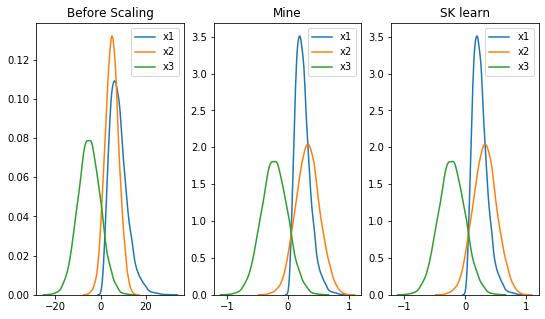

In [16]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax= ax1)
sns.kdeplot(df['x2'], ax= ax1)
sns.kdeplot(df['x3'], ax= ax1)

ax2.set_title('Mine')
sns.kdeplot(maxabs(df['x1']), ax= ax2)
sns.kdeplot(maxabs(df['x2']), ax= ax2)
sns.kdeplot(maxabs(df['x3']), ax= ax2)


scaler = preprocessing.MaxAbsScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])
ax3.set_title('SK learn')
sns.kdeplot(scaled_df['x1'], ax= ax3)
sns.kdeplot(scaled_df['x2'], ax= ax3)
sns.kdeplot(scaled_df['x3'], ax= ax3)

plt.show()

### 'Robust scaling'
- median, IQR 사용. Outlier 영향 최소화 

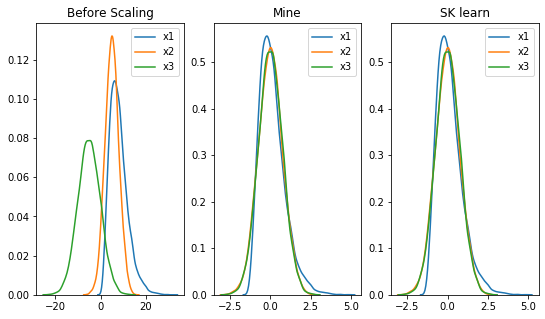

In [17]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax= ax1)
sns.kdeplot(df['x2'], ax= ax1)
sns.kdeplot(df['x3'], ax= ax1)

ax2.set_title('Mine')
sns.kdeplot(robust(df['x1']), ax= ax2)
sns.kdeplot(robust(df['x2']), ax= ax2)
sns.kdeplot(robust(df['x3']), ax= ax2)


scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])
ax3.set_title('SK learn')
sns.kdeplot(scaled_df['x1'], ax= ax3)
sns.kdeplot(scaled_df['x2'], ax= ax3)
sns.kdeplot(scaled_df['x3'], ax= ax3)

plt.show()